# **Linear Regression:**

#### javad vahdat `vahdatjavad@gmail.com`

 - Linear Regression known as **Statistical Supervised Machine Learning**

<img src="media/lm1.jpg" alt="positively-skewed" style="width:400px;height:250px;">

**Scatter Plot**

<table>
<td>
<img src="media/lm01.png" alt="positively-skewed" style="width:200px;height:250px;">
<td>
<td>
<img src="media/lm02.png" alt="positively-skewed" style="width:200px;height:250px;">
</td>
</td>
</td>
</table>

**Simple Linear Regression**
\begin{equation}
Y=\beta_0+\beta_1X+\epsilon
\end{equation}

We add $\epsilon$ as random variable to equation for preventing bias that $\epsilon \sim N(0,1)$

Notice that $y=\beta_0+\beta_1x^2+\epsilon$ is also a linear model but $y=\beta_0x^{\beta_1}+\epsilon$ is not linear model!!

**Parameters estimator** for simple linear regression:
 - $\widehat{\beta_1}=\frac{\sum(x_i-\bar{x})(y_i-\bar{y})}{\sum(x_i-\bar{x})^2}$
 - $\widehat{\beta_0}=\bar{y}-\widehat{\beta_1}\bar{x}$

<img src="media/lm05.png" alt="positively-skewed" style="width:500px;height:350px;">

So let's go to do an example:
 - **see below plot and guess what function can fit to this scatter plot**?

<img src="media/lm06.png" alt="positively-skewed" style="width:400px;height:300px;">

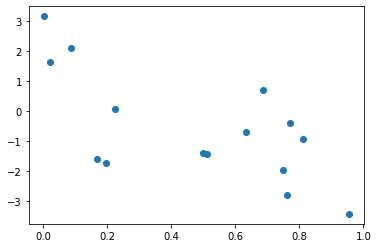

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(10)

x = np.random.uniform(0,1,(15,))
e = np.random.standard_normal((15,))
y = np.cos(10*x) + 4*x**3 -5*x + e
plt.plot(x,y,"o")

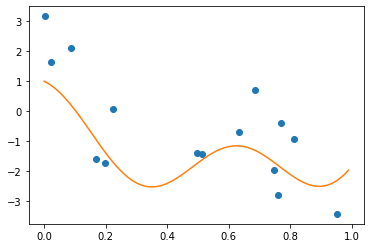

In [2]:
plt.plot(x,y,"o")
x2 = np.arange(0,1,0.01)
plt.plot(x2,np.cos(10*x2) + 4*x2**3 -5*x2)

## “All models are wrong, but some are useful”
George Box

**How we can fit a line to a scatter plot**:

<img src="media/lm03.png" alt="positively-skewed" style="width:200px;height:200px;">

Sum of Square Error = $\sum\epsilon^2$

<img src="media/lm04.png" alt="positively-skewed" style="width:450px;height:300px;">

**Tips on simple linear regression**
 - **Residual randomness in simple linear regression**
 - **Normality of residuals in simple linear regression**
 - **Constant variance in simple linear regression**

**Doing an example:**

We use a dataset from kaggle includes 10000 weights and heights.

In [3]:
import pandas as pd

df=pd.read_csv('weight-height.csv')

df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
print(df.shape)
print(df.dtypes)

(10000, 3)
Gender     object
Height    float64
Weight    float64
dtype: object


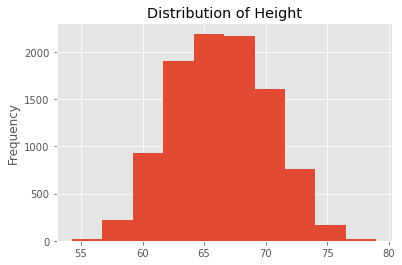

In [5]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
 
# Histogram of the height
df.Height.plot(kind='hist', title='Distribution of Height');


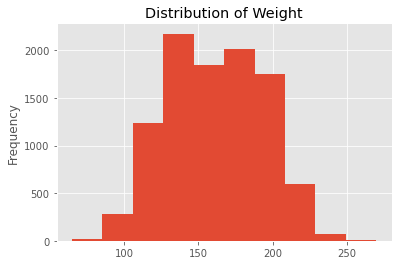

In [6]:
# Histogram of the weight
df.Weight.plot(kind='hist', title='Distribution of Weight');

Text(0.5, 1.0, 'Distribution of Height')

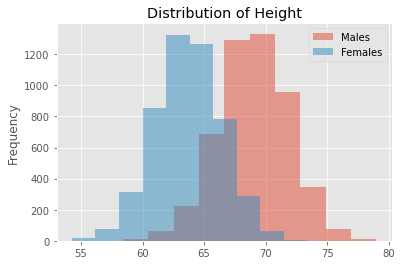

In [7]:
# Histogram of the height males and females
df[df['Gender']=='Male'].Height.plot(kind='hist',alpha=0.5)
df[df['Gender']=='Female'].Height.plot(kind='hist',alpha=0.5)
plt.legend(labels=['Males','Females'])
plt.title('Distribution of Height')

Text(0.5, 1.0, 'Distribution of Weight')

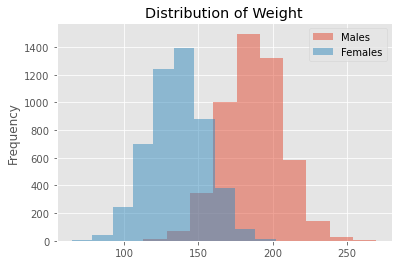

In [8]:
# Histogram of the weight males and females

df[df['Gender']=='Male'].Weight.plot(kind='hist',alpha=0.5)
df[df['Gender']=='Female'].Weight.plot(kind='hist',alpha=0.5)
plt.legend(labels=['Males','Females'])
plt.title('Distribution of Weight')

In [9]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [10]:
# Descriptive statistics male
stat_male = df[df['Gender']=='Male'].describe()
stat_male.rename(columns=lambda x:x+'_male',inplace=True)

# Descriptive statistics female
stat_female = df[df['Gender']=='Female'].describe()
stat_female.rename(columns=lambda x:x+'_female',inplace=True)
 
# Dataframe that contains statistics for both male and female
stat = pd.concat([stat_male,stat_female], axis=1, )
stat

,Height_male,Weight_male,Height_female,Weight_female
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,69.026346,187.020621,63.708774,135.860093
std,2.863362,19.781155,2.696284,19.022468
min,58.406905,112.902939,54.263133,64.700127
25%,67.174679,173.887767,61.894441,122.934096
50%,69.027709,187.033546,63.730924,136.117583
75%,70.988744,200.357802,65.563565,148.810926
max,78.998742,269.989699,73.389586,202.237214


Text(0.5, 1.0, 'Relationship between Height and Weight')

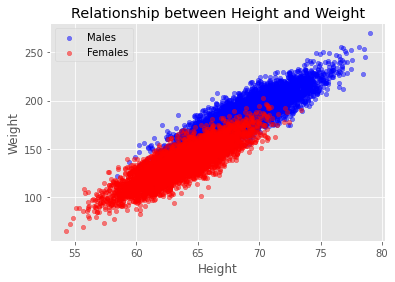

In [11]:
# Scatter plot of Height and Weight
 
ax1= df[df['Gender']=='Male'].plot(kind='scatter', x='Height',y='Weight',alpha=0.5, color='blue')
df[df['Gender']=='Female'].plot(kind='scatter', x='Height',y='Weight',alpha=0.5 , ax=ax1, color='red')
plt.legend(labels=['Males','Females'])
plt.title('Relationship between Height and Weight')

The plot above shows the **relationship** between **height** and **weight** for men and women. This plot contains 10,000 samples, which is why we have **overplotting**. Overplotting occurs when data overlaps in a plot and it becomes difficult to display individual data points. Of course, one of the reasons is the large number of data, which here is the data points of 5,000 men and 5,000 women. Another reason could be the lack of unique values for a variable.

### Simple linear regression plot using `seaborn` library:

Text(0.5, 1.0, 'Relationship between Height and Weight')

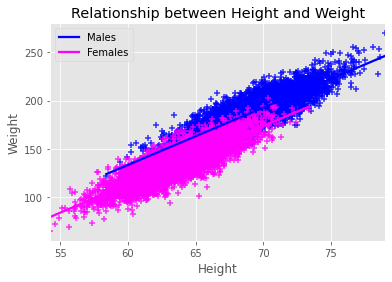

In [12]:
import seaborn as sns
 
df_males = df[df['Gender']=='Male']
df_females = df[df['Gender']=='Female']

# Regression plot using seaborn.
sns.regplot( x=df_males.Height,   y=df_males.Weight,    color='blue',    marker='+')
sns.regplot( x=df_females.Height, y=df_females.Weight,  color='magenta', marker='+')
 
# Legend, title and labels.
plt.legend(labels=['Males','Females'])
plt.title('Relationship between Height and Weight')


The plot above has **overplotting**, because the number of points is too high. To better represent a regression graph, we redraw it with **300 random samples** from each set of men and women. Note that the graph shows a **positive linear relationship** between height and weight for men and women.

Text(0.5, 1.0, 'Relationship between Height and Weight')

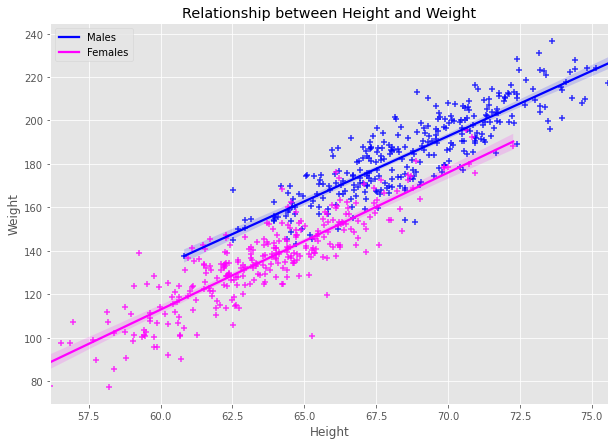

In [13]:
import seaborn as sns
 
# Samples
df_males_sample= df[df['Gender']=='Male'].sample(300)
df_females_sample= df[df['Gender']=='Female'].sample(300)
 
# Regression plot using seaborn.
fig = plt.figure(figsize=(10,7))

sns.regplot(x=df_males_sample.Height,   y=df_males_sample.Weight,   color='blue', marker='+')
sns.regplot(x=df_females_sample.Height, y=df_females_sample.Weight, color='magenta', marker='+')
 
# Legend, title and labels.
plt.legend(labels=['Males','Females'])
plt.title('Relationship between Height and Weight')

### Simple linear regression plot using `Scikit-Learn` library:

In [14]:
from sklearn.linear_model import LinearRegression
 
df_males = df[df['Gender']=='Male']
 
# Create linear regression object.
lr_males= LinearRegression()
 
# Fit linear regression.
lr_males.fit(df_males[['Height']], df_males['Weight'])
 
# Get the slope and intercept of the line best fit.
print(lr_males.intercept_)
print(lr_males.coef_)

-224.4988407054588
[5.96177381]


In [15]:
print("linear model for males is Y =", lr_males.intercept_, "+", lr_males.coef_, "X" )

linear model for males is Y = -224.4988407054588 + [5.96177381] X


In [16]:
df_females = df[df['Gender']=='Female']
 
# Create linear regression object.
lr_females= LinearRegression()
 
# Fit linear regression.
lr_females.fit(df_females[['Height']], df_females['Weight'])
 
# Get the slope and intercept of the line best fit.
print(lr_females.intercept_)
print(lr_females.coef_)

-246.01326574667266
[5.99404661]


In [17]:
print("linear model for females is Y =", lr_females.intercept_, "+", lr_females.coef_, "X" )

linear model for females is Y = -246.01326574667266 + [5.99404661] X


### Residual plot

Text(0.5, 1.0, 'Residual plot 500 females')

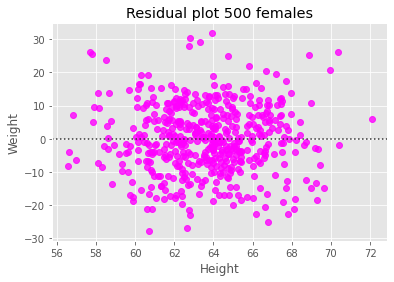

In [18]:
import seaborn as sns
 
# Dataframe containing only females.
df_females = df[df['Gender']=='Female'].sample(500)
 
# Residual plot 500 females.
sns.residplot(x = 'Height', y = 'Weight', data = df_females, color='magenta')
 
# Title and labels.
plt.title('Residual plot 500 females')

Text(0.5, 1.0, 'Residual plot 500 males')

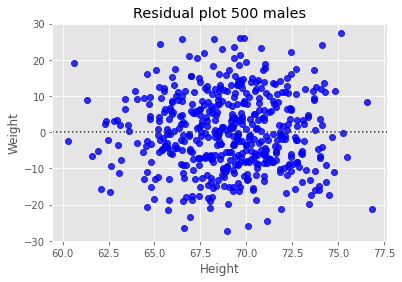

In [19]:
# Dataframe containing only males.
df_males = df[df['Gender']=='Male'].sample(500)
 
# Residual plot 500 males.
sns.residplot(x = 'Height', y = 'Weight', data = df_males, color='blue')
 
# Title and labels.
plt.title('Residual plot 500 males')

#### javad vahdat `vahdatjavad@gmail.com`